# Building a NN and training it using the CIFAR10 dataset.

## Importing libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import os
from sklearn.model_selection import RandomizedSearchCV

## Loading dataset

In [2]:
(x_train_full, y_train_full), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
x_train_full.shape

(50000, 32, 32, 3)

In [4]:
x_test.shape

(10000, 32, 32, 3)

In [5]:
x_valid, x_train = x_train_full[:5000], x_train_full[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

## Building the model

In [6]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [7]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.relu, kernel_initializer = keras.initializers.he_normal()))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [8]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

- Now we need to find an optimal learning rate. To do this we will use a Nadam optimizer and train the model for 10 epochs with different learning rates.
- We will be setting up a tensorboard environment using a tensorboard callback and check the performance of the model.

In [9]:
learning_rate = 0.00025

In [10]:
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'optimal_lr_model', 'lr = {}'.format(learning_rate))
tb_callback = keras.callbacks.TensorBoard(run_logdir)
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_model.h5', save_best_only = True)

In [11]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(learning_rate = learning_rate), metrics = 'accuracy')

In [12]:
model.fit(x_train, y_train, epochs = 10, validation_data = (x_valid, y_valid), callbacks = [tb_callback])

Epoch 1/10
   1/1407 [..............................] - ETA: 0s - loss: 165.7273 - accuracy: 0.0625WARNING:tensorflow:From /home/gokul/.local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 8s 6ms/step - loss: 2.7819 - accuracy: 0.1722 - val_loss: 2.0820 - val_accuracy: 0.2038
Epoch 2/10
1407/1407 [==============================] - 7s 5ms/step - loss: 1.9937 - accuracy: 0.2514 - val_loss: 2.1159 - val_accuracy: 0.2318
Epoch 3/10
1407/1407 [==============================] - 9s 6ms/step - loss: 1.9164 - accuracy: 0.2812 - val_loss: 1.9130 - val_accuracy: 0.2824
Epoch 4/10
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8650 - accuracy: 0.3061 - val_loss: 1.8742 - val_accuracy: 0.3116
Epoch 5/10
1407/1407 [===========================

- From multiple trial and error values for learning rate, it was found that the model performed the best at a learning rate of 0.00025.

In [13]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.relu, kernel_initializer = keras.initializers.he_normal()))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [15]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [16]:
optimal_lr = 0.00025

In [17]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(learning_rate = optimal_lr), metrics = 'accuracy')

In [18]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_model', save_best_only=True, save_weights_only = True)
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'optimal_lr_model')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [19]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_valid, y_valid), callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 9s 7ms/step - loss: 2.7819 - accuracy: 0.1722 - val_loss: 2.0820 - val_accuracy: 0.2038
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9937 - accuracy: 0.2514 - val_loss: 2.1159 - val_accuracy: 0.2318
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.9164 - accuracy: 0.2812 - val_loss: 1.9130 - val_accuracy: 0.2824
Epoch 4/100
1407/1407 [==============================] - 8s 5ms/step - loss: 1.8650 - accuracy: 0.3061 - val_loss: 1.8742 - val_accuracy: 0.3116
Epoch 5/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.8361 - accuracy: 0.3218 - val_loss: 1.9204 - val_accuracy: 0.2920
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7965 - accuracy: 0.3409 - val_loss: 1.8150 - val_accuracy: 0.3338
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7458 - accuracy: 0.3650 - val_loss: 1.7359 - val_ac

In [20]:
model.evaluate(x_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5790 - accuracy: 0.4686


[1.5790321826934814, 0.46860000491142273]

In [21]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5602 - accuracy: 0.4689


[1.5602147579193115, 0.46889999508857727]

In [22]:
model.load_weights('CIFAR10_model')

In [23]:
model.evaluate(x_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.5258 - accuracy: 0.4720


[1.5257840156555176, 0.47200000286102295]

In [24]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.5075 - accuracy: 0.4742


[1.5074900388717651, 0.4742000102996826]

- We can see that the model with the least validation_loss gives us am accuracy of 47% on the validation and test data.

## Adding batch normalization

- We will be adding the batvh normalization layers in the net and check its performance variations.
- Again as we changed the model architecture, we need to find the optimal learning rate by trial and error.

In [175]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [176]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer = keras.initializers.he_normal()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [177]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [178]:
learning_rate = 0.0015

In [179]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(lr = learning_rate), metrics = 'accuracy')

In [180]:
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'BN', 'lr = {}'.format(learning_rate))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [181]:
history = model.fit(x_train, y_train, epochs = 20, validation_data = (x_valid, y_valid), callbacks = [tensorboard_cb])

Epoch 1/20
1407/1407 [==============================] - 18s 13ms/step - loss: 1.8514 - accuracy: 0.3351 - val_loss: 1.7488 - val_accuracy: 0.3762
Epoch 2/20
1407/1407 [==============================] - 17s 12ms/step - loss: 1.7044 - accuracy: 0.3926 - val_loss: 1.6794 - val_accuracy: 0.3950
Epoch 3/20
1407/1407 [==============================] - 18s 13ms/step - loss: 1.6400 - accuracy: 0.4171 - val_loss: 1.6474 - val_accuracy: 0.4116
Epoch 4/20
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5878 - accuracy: 0.4350 - val_loss: 1.6109 - val_accuracy: 0.4320
Epoch 5/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5416 - accuracy: 0.4529 - val_loss: 1.5223 - val_accuracy: 0.4540
Epoch 6/20
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5039 - accuracy: 0.4670 - val_loss: 1.4697 - val_accuracy: 0.4698
Epoch 7/20
1407/1407 [==============================] - 15s 10ms/step - loss: 1.4666 - accuracy: 0.4794 - val_loss: 1.4893 -

- After using different learning rates, it was found that the model having lr = 0.001 gives the best performance.

In [220]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [221]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer = keras.initializers.he_normal()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [222]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [223]:
optimal_lr = 0.001

In [225]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(learning_rate = optimal_lr), metrics = ['accuracy'])

In [245]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_BN_model', save_best_only = True, save_weights_only = True)
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'BN', 'optimal_lr_model', 'lr = {}'.format(optimal_lr))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
one_cycle_

In [246]:
history = model.fit(x_train, y_train, epochs = 100, validation_data = (x_valid, y_valid), callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 17s 12ms/step - loss: 1.8374 - accuracy: 0.3410 - val_loss: 1.6944 - val_accuracy: 0.4008
Epoch 2/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6859 - accuracy: 0.3998 - val_loss: 1.6820 - val_accuracy: 0.3850
Epoch 3/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.6192 - accuracy: 0.4231 - val_loss: 1.6028 - val_accuracy: 0.4250
Epoch 4/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.5717 - accuracy: 0.4369 - val_loss: 1.5617 - val_accuracy: 0.4480
Epoch 5/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.5286 - accuracy: 0.4608 - val_loss: 1.4750 - val_accuracy: 0.4708
Epoch 6/100
1407/1407 [==============================] - 15s 11ms/step - loss: 1.4899 - accuracy: 0.4730 - val_loss: 1.4929 - val_accuracy: 0.4742
Epoch 7/100
1407/1407 [==============================] - 16s 11ms/step - loss: 1.4539 - accuracy: 0.4841 - val_loss: 1

In [247]:
model.evaluate(x_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.3898 - accuracy: 0.5472


[1.389768123626709, 0.5472000241279602]

In [248]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3966 - accuracy: 0.5371


[1.3966196775436401, 0.5371000170707703]

In [249]:
model.load_weights('CIFAR10_BN_model')

In [250]:
model.evaluate(x_valid, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.3185 - accuracy: 0.5530


[1.3185102939605713, 0.5529999732971191]

In [251]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.3248 - accuracy: 0.5398


[1.3248482942581177, 0.5397999882698059]

- We can see that the model reached the lowest val_loss at 23 epochs when we added BN to the net.
- Adding BN enabled us to use much larger lr which reduced the total training time.
- The metrics of the model are also better with the validation and test accuracies being 55% and 53% respectively.
- The only drawback is that the time taken to complete each epoch increased from 10s to 16s, but on overall the total training time is decreased.

## Replacing BN with SELU

- We need to standardize the inputs in order to use the SELU activation func.

In [6]:
x_mean = x_train.mean(axis = 0, keepdims = True)
x_std = x_train.std(axis = 0, keepdims = True)

In [7]:
x_train_scaled = (x_train - x_mean) / x_std
x_valid_scaled = (x_valid - x_mean) / x_std
x_test_scaled = (x_test - x_mean) / x_std

In [342]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [343]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal()))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [344]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [345]:
learning_rate = 0.0008

In [346]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(learning_rate), metrics = ['accuracy'])

In [347]:
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'SELU', 'lr = {}'.format(learning_rate))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [348]:
history = model.fit(x_train_scaled, y_train, epochs = 20, validation_data = (x_valid_scaled, y_valid), callbacks = [tensorboard_cb])

Epoch 1/20
1407/1407 [==============================] - 9s 7ms/step - loss: 1.9313 - accuracy: 0.3097 - val_loss: 1.8588 - val_accuracy: 0.3136
Epoch 2/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.7200 - accuracy: 0.3890 - val_loss: 1.7384 - val_accuracy: 0.3778
Epoch 3/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.6249 - accuracy: 0.4275 - val_loss: 1.7290 - val_accuracy: 0.3988
Epoch 4/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5634 - accuracy: 0.4478 - val_loss: 1.6357 - val_accuracy: 0.4336
Epoch 5/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5074 - accuracy: 0.4691 - val_loss: 1.5887 - val_accuracy: 0.4392
Epoch 6/20
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4673 - accuracy: 0.4866 - val_loss: 1.5583 - val_accuracy: 0.4644
Epoch 7/20
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4314 - accuracy: 0.5005 - val_loss: 1.5709 - val_accuracy:

- After changing the architecture we could find that the model performs at its best at lr = 0.0004.

In [363]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [364]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal()))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [365]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [366]:
optimal_lr = 0.0004

In [367]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(optimal_lr), metrics = ['accuracy'])

In [368]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_SELU_model', save_best_only = True, save_weights_only = True)
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'SELU', 'optimal_model', 'lr = {}'.format(optimal_lr))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [369]:
history = model.fit(x_train_scaled, y_train, epochs = 100, validation_data = (x_valid_scaled, y_valid), callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

Epoch 1/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.8783 - accuracy: 0.3294 - val_loss: 1.7889 - val_accuracy: 0.3518
Epoch 2/100
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6694 - accuracy: 0.4085 - val_loss: 1.7444 - val_accuracy: 0.3730
Epoch 3/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.5651 - accuracy: 0.4500 - val_loss: 1.5895 - val_accuracy: 0.4310
Epoch 4/100
1407/1407 [==============================] - 9s 7ms/step - loss: 1.4906 - accuracy: 0.4757 - val_loss: 1.5508 - val_accuracy: 0.4604
Epoch 5/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.4261 - accuracy: 0.4994 - val_loss: 1.5326 - val_accuracy: 0.4566
Epoch 6/100
1407/1407 [==============================] - 9s 6ms/step - loss: 1.3760 - accuracy: 0.5150 - val_loss: 1.4838 - val_accuracy: 0.4800
Epoch 7/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.3262 - accuracy: 0.5373 - val_loss: 1.4950 - val_

In [371]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.6528 - accuracy: 0.5068


[1.652758240699768, 0.5067999958992004]

In [372]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.6576 - accuracy: 0.5017


[1.657639980316162, 0.5016999840736389]

In [373]:
model.load_weights('CIFAR10_SELU_model')

In [374]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4441 - accuracy: 0.5000


[1.4440743923187256, 0.5]

In [376]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4459 - accuracy: 0.4979


[1.445914626121521, 0.49790000915527344]

- It is the fastest model by far as the best model in terms of val_error was achieved in 8 epochs with 10s for each epoch.
- But the drawback is the model performance which even though is better than the raw model is less than that of the model with BN layers.

## Using AlphaDropouts for regularization

In [10]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal()))
model.add(keras.layers.AlphaDropout(rate = 0.1))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [13]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(), metrics = ['accuracy'])

In [14]:
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'Dropout', 'Div_3_dropout')
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [ ]:
history = model.fit(x_train_scaled, y_train, epochs = 20, validation_data = (x_valid_scaled, y_valid), callbacks = [tensorboard_cb])

Epoch 1/20
   1/1407 [..............................] - ETA: 0s - loss: 3.0241 - accuracy: 0.0938WARNING:tensorflow:From /home/gokul/.local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
 383/1407 [=======>......................] - ETA: 5s - loss: 2.1534 - accuracy: 0.2321

- After training the model we could see that the model performs the best when dropout is added after the last hidden layer.
- Now we need to decide the dropout rate as well as the learning_rate for which we will be using Randomized Search CV.

In [85]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [86]:
def build_model(dropout_rate = 0.1, learning_rate = 1e-3):
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
    for _ in range(20):
        model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal()))
    model.add(keras.layers.AlphaDropout(rate = dropout_rate))
    model.add(keras.layers.Dense(10, activation = keras.activations.softmax))
    model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(lr = learning_rate), metrics = ['accuracy'])
    return model

In [87]:
classifier = keras.wrappers.scikit_learn.KerasClassifier(build_model)

In [88]:
params = {'dropout_rate' : [0.03, 0.1], 'learning_rate' : [0.0001, 0.0003]}

In [89]:
rand_search = RandomizedSearchCV(estimator = classifier, param_distributions = params, n_iter = 1)

In [90]:
rand_search.fit(x_train, y_train, epochs = 100, validation_data = (x_valid, y_valid), callbacks = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True))

Epoch 1/100
1125/1125 [==============================] - 6s 6ms/step - loss: 2.0797 - accuracy: 0.2344 - val_loss: 1.8949 - val_accuracy: 0.2986
Epoch 2/100
1125/1125 [==============================] - 6s 6ms/step - loss: 1.8699 - accuracy: 0.3185 - val_loss: 1.7980 - val_accuracy: 0.3504
Epoch 3/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7942 - accuracy: 0.3502 - val_loss: 1.7778 - val_accuracy: 0.3464
Epoch 4/100
1125/1125 [==============================] - 6s 6ms/step - loss: 1.7502 - accuracy: 0.3672 - val_loss: 1.7320 - val_accuracy: 0.3730
Epoch 5/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.7119 - accuracy: 0.3814 - val_loss: 1.7495 - val_accuracy: 0.3668
Epoch 6/100
1125/1125 [==============================] - 7s 6ms/step - loss: 1.6812 - accuracy: 0.3937 - val_loss: 1.6764 - val_accuracy: 0.3908
Epoch 7/100
1125/1125 [==============================] - 6s 6ms/step - loss: 1.6541 - accuracy: 0.4060 - val_loss: 1.6416 - val_ac

RandomizedSearchCV(estimator=<tensorflow.python.keras.wrappers.scikit_learn.KerasClassifier object at 0x7fdf1402d5b0>,
                   n_iter=1,
                   param_distributions={'dropout_rate': [0.03, 0.1],
                                        'learning_rate': [0.0001, 0.0003]})

In [91]:
rand_search.best_params_

{'learning_rate': 0.0003, 'dropout_rate': 0.03}

In [92]:
rand_search.best_score_

0.46155555844306945

- As we can see the model performs better on a dropout rate of 0.03 and a lr of 0.0003. 

In [9]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [10]:
learning_rate = 3e-4
dropout_rate = 0.03

In [11]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal()))
model.add(keras.layers.AlphaDropout(rate = dropout_rate))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [13]:
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(lr = learning_rate), metrics = ['accuracy'])

In [14]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_Dropout_model', save_best_only = True, save_weights_only = True)
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', 'Dropout', 'optimal_model', 'lr = {}'.format(learning_rate))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

In [15]:
history = model.fit(x_train_scaled, y_train, epochs = 100, validation_data = (x_valid_scaled, y_valid), callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb])

Epoch 1/100
   1/1407 [..............................] - ETA: 0s - loss: 2.9325 - accuracy: 0.1562WARNING:tensorflow:From /home/gokul/.local/lib/python3.8/site-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1407/1407 [==============================] - 9s 6ms/step - loss: 1.8803 - accuracy: 0.3300 - val_loss: 1.7047 - val_accuracy: 0.4004
Epoch 2/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6275 - accuracy: 0.4248 - val_loss: 1.5999 - val_accuracy: 0.4342
Epoch 3/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.5197 - accuracy: 0.4628 - val_loss: 1.5673 - val_accuracy: 0.4450
Epoch 4/100
1407/1407 [==============================] - 8s 6ms/step - loss: 1.4527 - accuracy: 0.4902 - val_loss: 1.5385 - val_accuracy: 0.4620
Epoch 5/100
1407/1407 [=========================

In [16]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4472 - accuracy: 0.4972


[1.4472453594207764, 0.49720001220703125]

In [17]:
model.load_weights('CIFAR10_Dropout_model')

In [18]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4472 - accuracy: 0.4972


[1.4472453594207764, 0.49720001220703125]

In [19]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4405 - accuracy: 0.4987


[1.4404797554016113, 0.49869999289512634]

- The model achieved an accuracy of 49.8% which is less than that achieved by using Batch Normalization.
- But this model converged the fastest, in 6 epochs with each epoch having a time period of 10s.

## Using MCAlphaDropout after training

In [8]:
# Defining the MC AlphaDroput class
class MC_Alpha_Dropout(keras.layers.AlphaDropout):
    def call(self, inputs):
        return super().call(inputs, training = True)

In [20]:
# Creating a new model by replacing the AlphaDropout layers with the above custom layer class.
mc_model = keras.models.Sequential()
[mc_model.add(MC_Alpha_Dropout(layer.rate)) if isinstance(layer, keras.layers.AlphaDropout) else mc_model.add(layer) for layer in model.layers]

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [22]:
mc_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)              

In [42]:
# Defining a function for predicting the output probabilities of each class for n-samples. 
# Keep in mind that these samples wiil be different from each other due to the randomness of the dropout layer.
def mc_dropout_predict_probas(mc_model, x, n_sample = 10):
    y_prob = [mc_model.predict(x) for sample in range(n_sample)]
    return np.mean(y_prob, axis = 0)
# Using the above probability value to predict the class to which an image belongs.
def mc_dropout_predict_class(mc_model, x, n_sample = 10):
    y_prob = mc_dropout_predict_probas(mc_model, x, n_sample)
    return np.argmax(y_prob, axis = 1)

In [43]:
# Predicting the outputs for the validation dataset.
y_pred = mc_dropout_predict_class(mc_model, x_valid_scaled)

In [45]:
y_valid.shape

(5000, 1)

In [46]:
# Calculating the accuracy of the predictions
accuracy = np.mean(y_pred == y_valid[:, 0])
print(accuracy)

0.4954


- We can see that there is no change in the performance of the model after applying MCAlphaDropout

## 1cycle lr scheduling

- We will be scheduling the learning rate of the model using 1cycle strategy and check the model's performance.
- For that we need the maximum learning rate at which the model diverges.

In [12]:
k = keras.backend

In [13]:
# Class for increasing the lr by the input factor and to get the lr and loss values at the end of each epoch
class exponential_lr(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.loss = []
    def on_batch_end(self, batch, logs):
        self.rates.append(k.get_value(self.model.optimizer.lr))
        self.loss.append(logs['loss'])
        k.set_value(self.model.optimizer.lr, self.model.optimizer.lr * self.factor)    

In [21]:
# The function for training the model and finding the learning rate at which the model diverges
# It is done by replacing the model's lr with the set min_rate and then increasing it by the factor at the end of each iteration.
# In the end the model is restored to its initial lr and weights for further use.
def find_lr(model, x, y, epochs = 1, batch_size = 32, min_rate = 1e-4, max_rate = 10):
    init_weights = model.get_weights()
    init_lr = k.get_value(model.optimizer.lr)
    iterations = len(x) // batch_size * epochs
    factor = np.exp(np.log(max_rate / min_rate) / iterations) # The factor by which the lr should be mutiplied
    k.set_value(model.optimizer.lr, min_rate)
    exp_lr = exponential_lr(factor)
    history = model.fit(x, y, epochs = epochs, batch_size = batch_size, callbacks = [exp_lr])
    k.set_value(model.optimizer.lr, init_lr)
    model.set_weights(init_weights)
    return exp_lr.rates, exp_lr.loss

In [150]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [151]:
# Creating the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal))
model.add(keras.layers.AlphaDropout(rate = 0.03))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [152]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [153]:
# Compiling the model
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 3e-4), metrics = 'accuracy')

In [154]:
# Using the above to find the max_rate at which the model starts to diverge
batch_size = 32
rates, losses = find_lr(model, x_train_scaled, y_train, epochs = 1, batch_size = batch_size)

1407/1407 [==============================] - 5s 4ms/step - loss: nan - accuracy: 0.1716


(0.14, 0.175, 2.2576181888580322, 10.0)

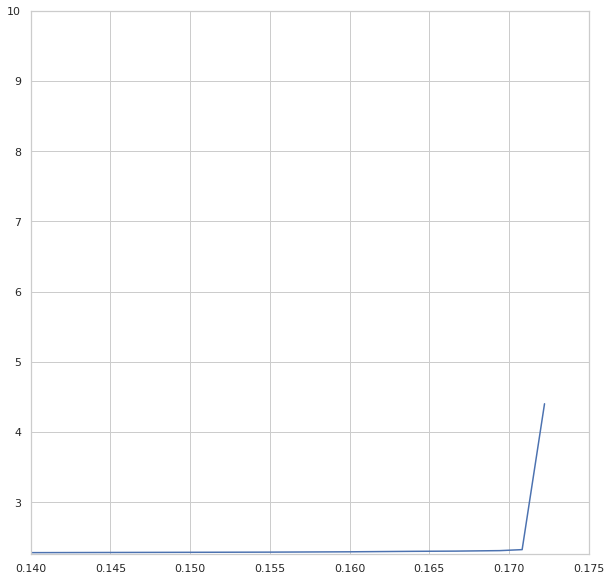

In [157]:
plt.figure(figsize = (10, 10))
sns.set(style = 'whitegrid')
sns.lineplot(rates, losses)
plt.axis([0.14, 0.175, min(losses), 10])

- We can see that at around lr = 0.4 the model starts to diverge.
- Now we need to define a custom 1cycle callback function which increases and decreases the lr as per the strategy.

In [129]:
class one_cycle_scheduler(keras.callbacks.Callback):
    def __init__(self, iterations, max_rate, start_rate = None, last_iterations = None, last_rate = None):
        self.iterations = iterations
        self.max_rate = max_rate
        self.start_rate = start_rate or max_rate / 10 # The max_rate should be approx 10 times the initial rate
        self.last_iterations = last_iterations or self.iterations // 10 + 1 # The last set of iterations where lr is decreased rapidly. 
        self.half_iteration = (self.iterations - self.last_iterations) // 2 # The iteration at which max_rate occurs.
        self.last_rate = last_rate or self.start_rate / 1000
        self.iteration = 0
    def _interpolate(self, iter1, iter2, rate1, rate2): # Func to interpolate the learning rate
        return ((rate2 - rate1) * (self.iteration - iter1) / (iter2 - iter1) + rate1)
    def on_batch_begin(self, batch, logs):
        if self.iteration < self.half_iteration: # Condition if the training is in the first half
            rate = self._interpolate(0, self.half_iteration, self.start_rate, self.max_rate)
        elif self.iteration < 2 * self.half_iteration: # Condition is the training is in the second half
            rate = self._interpolate(self.half_iteration, 2 * self.half_iteration, self.max_rate, self.start_rate)
        else: # When training is in the end iterations in which lr is decreased rapidly
            rate = self._interpolate(2 * self.half_iteration, self.iterations, self.start_rate, self.last_rate)
            rate = max(rate, self.last_rate)
        self.iteration += 1
        k.set_value(self.model.optimizer.lr, rate)

- Now that we have the callback func. we can go on to build and train the model

In [204]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [205]:
# Building the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
for _ in range(20):
    model.add(keras.layers.Dense(100, activation = keras.activations.selu, kernel_initializer = keras.initializers.lecun_normal()))
model.add(keras.layers.AlphaDropout(rate = 0.03))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [206]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_2 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_3 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_4 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_5 (Dense)              (None, 100)               1

In [207]:
learning_rate = 3e-4

In [208]:
# Compiling the model
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(learning_rate), metrics = ['accuracy'])

In [209]:
batch_size = 32
epochs = 15
iterations = len(x_train_scaled) // batch_size * epochs

In [210]:
# Initializing the callbacks
early_stopping_cb = keras.callbacks.EarlyStopping(patience = 20, restore_best_weights = True)
model_checkpoint_cb = keras.callbacks.ModelCheckpoint('CIFAR10_1cycle_model', save_best_only = True, save_weights_only = True)
run_logdir = os.path.join(os.curdir, 'CIFAR10_logs', '1cycle', 'start_rate = {}'.format(learning_rate))
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
one_cycle_cb = one_cycle_scheduler(iterations = iterations, max_rate = 0.125)
callbacks = [early_stopping_cb, model_checkpoint_cb, tensorboard_cb, one_cycle_cb]

In [211]:
# Training the model
history = model.fit(x_train_scaled, y_train, epochs = epochs, validation_data = (x_valid_scaled, y_valid), callbacks = callbacks)

Epoch 1/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.9018 - accuracy: 0.3212 - val_loss: 1.8578 - val_accuracy: 0.3370
Epoch 2/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.7097 - accuracy: 0.3962 - val_loss: 1.9729 - val_accuracy: 0.3124
Epoch 3/15
1407/1407 [==============================] - 6s 4ms/step - loss: 1.6433 - accuracy: 0.4218 - val_loss: 2.0499 - val_accuracy: 0.3400
Epoch 4/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6183 - accuracy: 0.4349 - val_loss: 1.8082 - val_accuracy: 0.3798
Epoch 5/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6173 - accuracy: 0.4374 - val_loss: 1.7758 - val_accuracy: 0.3612
Epoch 6/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6155 - accuracy: 0.4398 - val_loss: 1.7877 - val_accuracy: 0.3678
Epoch 7/15
1407/1407 [==============================] - 5s 4ms/step - loss: 1.6173 - accuracy: 0.4417 - val_loss: 1.9032 - val_accuracy:

In [212]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4532 - accuracy: 0.5304


[1.4532454013824463, 0.5303999781608582]

In [213]:
model.load_weights('CIFAR10_1cycle_model')

In [214]:
model.evaluate(x_valid_scaled, y_valid)

157/157 [==============================] - 0s 2ms/step - loss: 1.4299 - accuracy: 0.5298


[1.4299284219741821, 0.5297999978065491]

In [215]:
model.evaluate(x_test_scaled, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 1.4283 - accuracy: 0.5307


[1.4283372163772583, 0.5307000279426575]

- We can see that that the performance of the model has increased to 53% but still the best performance was achieved when using Batch Normalization.
- Now lets try normalize the model usign BN and implement 1cycle scheduling to try increase the performance of the model.

- The first step would be to find the max_rate value.
- While implementing BN earlier we found that the model performs the best on lr = 0.001.

In [317]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [318]:
# Building the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer = keras.initializers.he_normal()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [319]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 3072)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 3072)              12288     
_________________________________________________________________
dense (Dense)                (None, 100)               307300    
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
activation (Activation)      (None, 100)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               10100     
_________________________________________________________________
batch_normalization_2 (Batch (None, 100)               4

In [320]:
# Compiling the model
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.Nadam(0.01), metrics = 'accuracy')

In [321]:
# Getting the rates and corresponding loss after each iteration when increasing the learning rate
batch_size = 32
rates, losses = find_lr(model, x_train, y_train, epochs = 1, batch_size = batch_size)

1407/1407 [==============================] - 15s 10ms/step - loss: 138.4531 - accuracy: 0.1920


(0.2, 0.3, 0.0, 10.0)

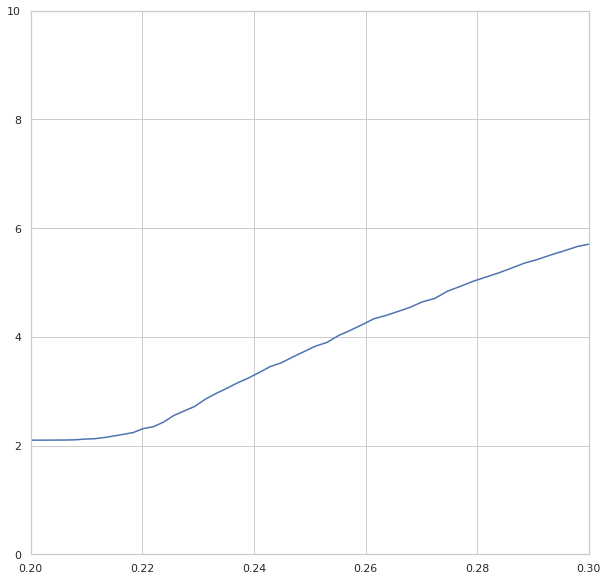

In [325]:
plt.figure(figsize = (10, 10))
sns.lineplot(x = rates, y = losses)
plt.axis([0.2, 0.3, 0, 10])

- We can see that the max_rate after which the loss rises is around 5.

In [326]:
keras.backend.clear_session()
tf.random.set_seed(42)
np.random.seed(42)

In [327]:
# Building the model
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape = [32, 32, 3]))
model.add(keras.layers.BatchNormalization())
for _ in range(20):
    model.add(keras.layers.Dense(100, kernel_initializer = keras.initializers.he_normal()))
    model.add(keras.layers.BatchNormalization())
    model.add(keras.layers.Activation('elu'))
model.add(keras.layers.Dense(10, activation = keras.activations.softmax))

In [328]:
# Compiling the model
model.compile(loss = keras.losses.sparse_categorical_crossentropy, optimizer = keras.optimizers.SGD(lr = 0.001), metrics = ['accuracy'])

In [329]:
epochs = 15
batch_size = 32
iterations = len(x_train) // batch_size * epochs

In [330]:
# Initializing the callback
one_cycle_cb = one_cycle_scheduler(iterations = iterations, max_rate = 0.2)

In [331]:
history = model.fit(x_train, y_train, epochs = epochs, validation_data = (x_valid, y_valid), callbacks = [one_cycle_cb])

Epoch 1/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.8607 - accuracy: 0.3311 - val_loss: 1.7437 - val_accuracy: 0.3688
Epoch 2/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.7049 - accuracy: 0.3914 - val_loss: 1.8058 - val_accuracy: 0.3532
Epoch 3/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6491 - accuracy: 0.4125 - val_loss: 1.7989 - val_accuracy: 0.3576
Epoch 4/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.6087 - accuracy: 0.4254 - val_loss: 1.7456 - val_accuracy: 0.3930
Epoch 5/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5699 - accuracy: 0.4431 - val_loss: 1.6241 - val_accuracy: 0.4190
Epoch 6/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5384 - accuracy: 0.4522 - val_loss: 1.5470 - val_accuracy: 0.4558
Epoch 7/15
1407/1407 [==============================] - 11s 8ms/step - loss: 1.5022 - accuracy: 0.4670 - val_loss: 1.6864 - val_ac